
预测结果:
  真实概率: 15.96%
  伪造概率: 84.04%
这张图为 假！！！！


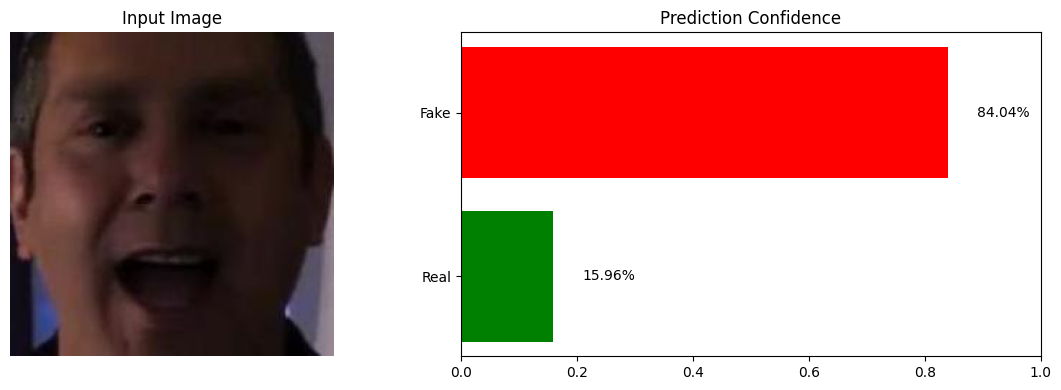

In [15]:
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载训练好的模型
def load_model(model_path, device):
    model = models.resnext50_32x4d(pretrained=False)
    model.fc = nn.Linear(model.fc.in_features, 2)  # 二分类
    model.load_state_dict(torch.load(model_path, map_location=device))
    model = model.to(device)
    model.eval()
    return model

# 2. 图像预处理
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                            std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # 添加batch维度

# 3. 预测函数
def predict(model, device, image_tensor):
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()

# 4. 可视化结果
def visualize_prediction(image_path, probs, class_names=['Real', 'Fake']):
    image = Image.open(image_path)
    
    plt.figure(figsize=(12, 4))
    
    # 显示图像
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Input Image')
    
    # 显示预测结果
    plt.subplot(1, 2, 2)
    bars = plt.barh(class_names, probs, color=['green', 'red'])
    plt.xlim(0, 1)
    plt.title('Prediction Confidence')
    
    # 在柱状图上显示概率值
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                f'{width:.2%}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

# 5. 主函数
def main():
    # 配置
    device = torch.device('cpu')
    model_path = 'resnext50_trained.pth'  # 训练好的模型路径
    image_path = 'faces_224/zzrhdjyrpw.jpg'        # 待测试图像路径
    
    # 加载模型和图像
    model = load_model(model_path, device)
    input_tensor = preprocess_image(image_path)
    
    # 预测
    probabilities = predict(model, device, input_tensor)
    
    # 显示结果
    print(f"\n预测结果:")
    print(f"  真实概率: {probabilities[0]:.2%}")
    print(f"  伪造概率: {probabilities[1]:.2%}")
    if(probabilities[0] > probabilities[1]):
        print("这张图为 真！")
    else:
        print("这张图为 假！！！！")
    visualize_prediction(image_path, probabilities)

if __name__ == "__main__":
    main()